# Beispiel 2 aus 7. Vorlesung: Maschennetz

In [1]:
import wntr
import math
from helper import to_cbs, to_ls, plot_results, da

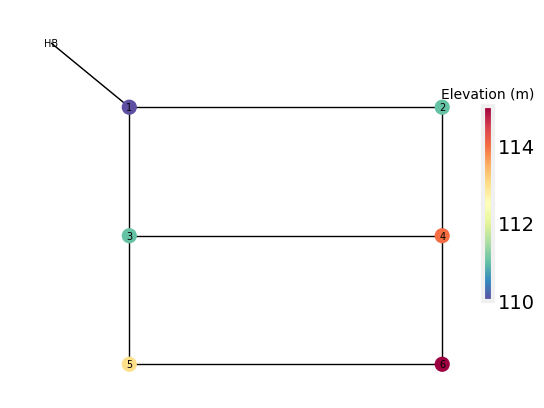

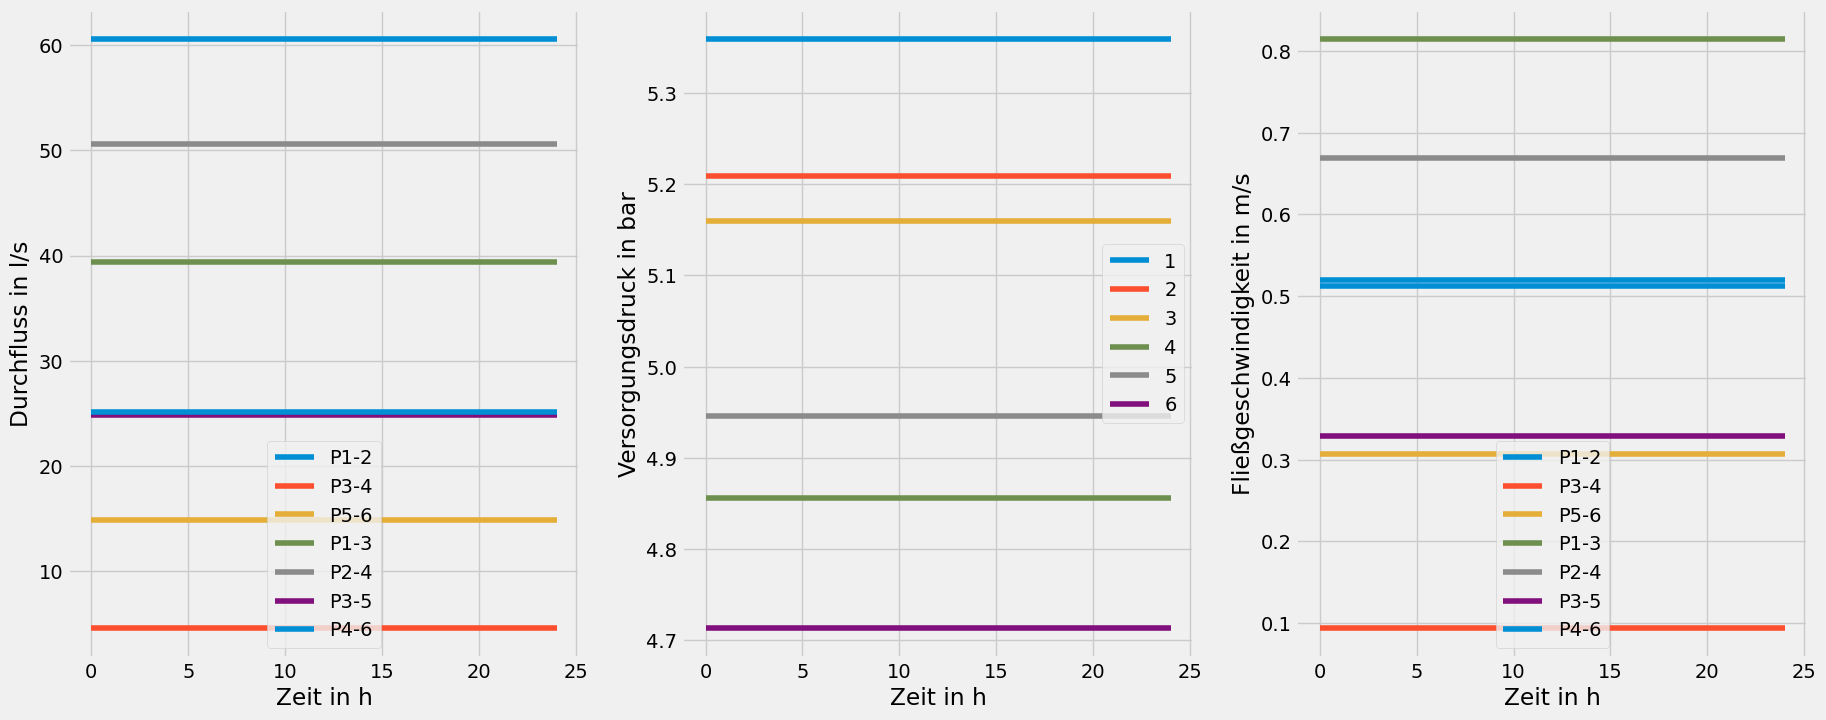

In [2]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()
wn.options.hydraulic.demand_model = 'PDD'

wn.add_pattern('pat', [1])


# Knoten generieren
wn.add_junction('1', base_demand=to_cbs(0),  demand_pattern='pat', elevation=110, coordinates=(0,0))
wn.add_junction('2', base_demand=to_cbs(10), demand_pattern='pat', elevation=111, coordinates=(2,0))
wn.add_junction('3', base_demand=to_cbs(10), demand_pattern='pat', elevation=111, coordinates=(0,-1))
wn.add_junction('4', base_demand=to_cbs(30), demand_pattern='pat', elevation=114, coordinates=(2,-1))
wn.add_junction('5', base_demand=to_cbs(10), demand_pattern='pat', elevation=113, coordinates=(0,-2))
wn.add_junction('6', base_demand=to_cbs(40), demand_pattern='pat', elevation=115, coordinates=(2,-2))

# Rohrnetzwerk
r = 100
wn.add_pipe('P1-2', '1', '2', length=200, diameter=da[250], roughness=r)
wn.add_pipe('P3-4', '3', '4', length=200, diameter=da[160], roughness=r)
wn.add_pipe('P5-6', '5', '6', length=200, diameter=da[160], roughness=r)

wn.add_pipe('P1-3', '1', '3', length=100, diameter=da[160], roughness=r)
wn.add_pipe('P2-4', '2', '4', length=100, diameter=da[200], roughness=r)
wn.add_pipe('P3-5', '3', '5', length=100, diameter=da[200], roughness=r)
wn.add_pipe('P4-6', '4', '6', length=100, diameter=da[160], roughness=r)

# Reservoir
wn.add_reservoir('HB', base_head=165.5, coordinates=(-0.5,0.5))
wn.add_pipe('A', 'HB', '1', length=3000, diameter=da[400], roughness=100)


# Simulate hydraulics
wn.options.time.duration = 24*3600
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

# Ergebnisse darstellen
plot_results(wn, results, drop_junction=['HB'], drop_link=['A'])